In [58]:
import pandas as pd
import pymysql
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [42]:
# connection to mysql database
connection = pymysql.connect(
    host='localhost',
    user='root',
    password='maxyboki',
    database='sp500'
)

warnings.filterwarnings("ignore")

In [54]:
query = """WITH StockVolatility AS ( 
    SELECT 
        stock_ticker,
        AVG(high_value - low_value) AS avg_daily_volatility
    FROM 
        sp500_stocks
    GROUP BY 
        stock_ticker
)
SELECT 
    c.shortname,
    c.sector,
    c.market_cap,
    c.revenue_growth,
    c.ebitda, 
    c.weight,  
    sv.stock_ticker,
    sv.avg_daily_volatility
FROM 
    StockVolatility sv
JOIN 
    sp500_company c ON sv.stock_ticker = c.stock_ticker
WHERE 
    c.market_cap IS NOT NULL 
    AND c.revenue_growth IS NOT NULL
ORDER BY 
    sv.avg_daily_volatility DESC;"""


In [46]:
df_stockVolatility = pd.read_sql(query, connection)

# close connection
connection.close()

In [56]:
df_stockVolatility

,shortname,sector,market_cap,revenue_growth,ebitda,weight,stock_ticker,avg_daily_volatility
0,"NVR, Inc.",Consumer Cyclical,28515348480,0.060,2.071504e+09,0.000509,NVR,70.337181
1,Booking Holdings Inc. Common St,Consumer Cyclical,163605921792,0.089,7.183000e+09,0.002923,BKNG,36.223453
2,"AutoZone, Inc.",Consumer Cyclical,52574404608,0.090,4.338463e+09,0.000939,AZO,21.017250
3,"Mettler-Toledo International, I",Healthcare,27797788672,0.013,1.143232e+09,0.000497,MTD,14.689289
4,"Regeneron Pharmaceuticals, Inc.",Healthcare,91035074560,0.106,4.598000e+09,0.001626,REGN,11.271859
...,...,...,...,...,...,...,...,...
493,Regions Financial Corporation,Financial Services,23285096448,0.156,NaN,0.000416,RF,0.356475
494,"Copart, Inc.",Industrials,54064603136,0.072,1.754323e+09,0.000966,CPRT,0.335548
495,Ford Motor Company,Consumer Cyclical,43597963264,0.055,9.360000e+09,0.000779,F,0.308866
496,Huntington Bancshares Incorpora,Financial Services,25119086592,-0.012,NaN,0.000449,HBAN,0.268366


In [50]:
correlation_matrix = df_stockVolatility[['avg_daily_volatility', 'market_cap', 'ebitda','weight','revenue_growth']].corr()

print(correlation_matrix)

                      avg_daily_volatility  market_cap    ebitda    weight  \
avg_daily_volatility              1.000000   -0.005103 -0.027902 -0.005106   
market_cap                       -0.005103    1.000000  0.852778  1.000000   
ebitda                           -0.027902    0.852778  1.000000  0.852778   
weight                           -0.005106    1.000000  0.852778  1.000000   
revenue_growth                    0.015283    0.178778  0.062289  0.178777   

                      revenue_growth  
avg_daily_volatility        0.015283  
market_cap                  0.178778  
ebitda                      0.062289  
weight                      0.178777  
revenue_growth              1.000000  


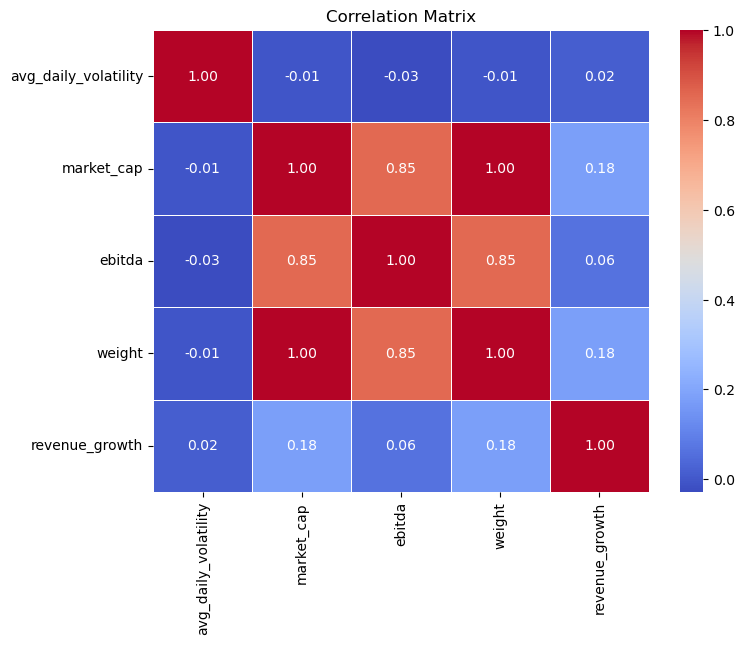

In [52]:
corr_matrix = df_stockVolatility[['avg_daily_volatility', 'market_cap', 'ebitda','weight','revenue_growth']].corr()


plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()